# Avocado Project

### Project Description:
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

## Inspiration /Label
The dataset can be seen in two angles to find the region and find the average price .
### Task:
One of Classification and other of Regression


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# Dataset Loading
df = pd.read_csv("avocado.csv")

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.shape

(18249, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [9]:
# renaming the some columns better unserstanding
df.rename(columns={'4046': 'PLU-4046', '4225': 'PLU-4225', '4770': 'PLU-4770'}, inplace=True)

In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'PLU-4046',
       'PLU-4225', 'PLU-4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [11]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [12]:
df['XLarge Bags'].value_counts()

XLarge Bags
0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: count, Length: 5588, dtype: int64

In [13]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
PLU-4046        0
PLU-4225        0
PLU-4770        0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
PLU-4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
PLU-4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
PLU-4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [15]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 27.5 MB/s eta 0:00:00


In [16]:
import pandas as pd
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


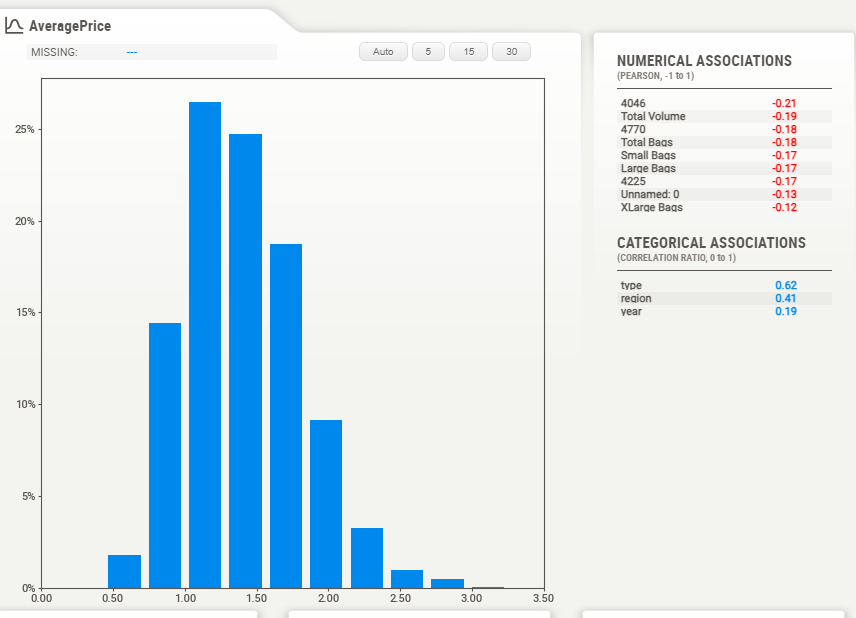

<Axes: >

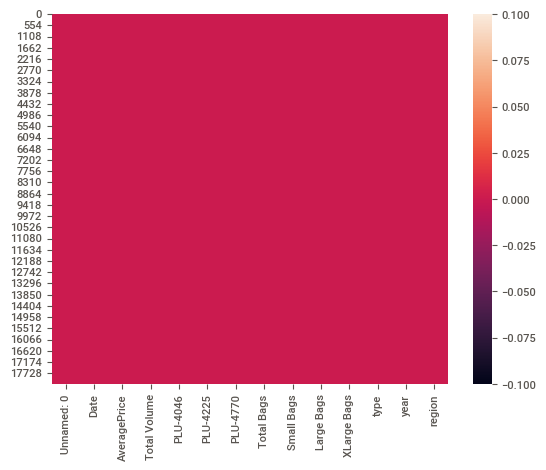

In [17]:
sns.heatmap(df.isnull())

<ipython-input-18-87eb44886773>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "type",data =df,palette ='rainbow') # type count plot


<Axes: xlabel='type', ylabel='count'>

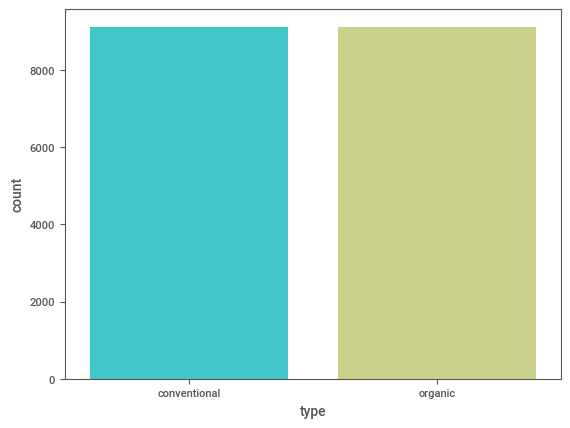

In [18]:
sns.countplot(x = "type",data =df,palette ='rainbow') # type count plot

# Avg Price year wise and region wise

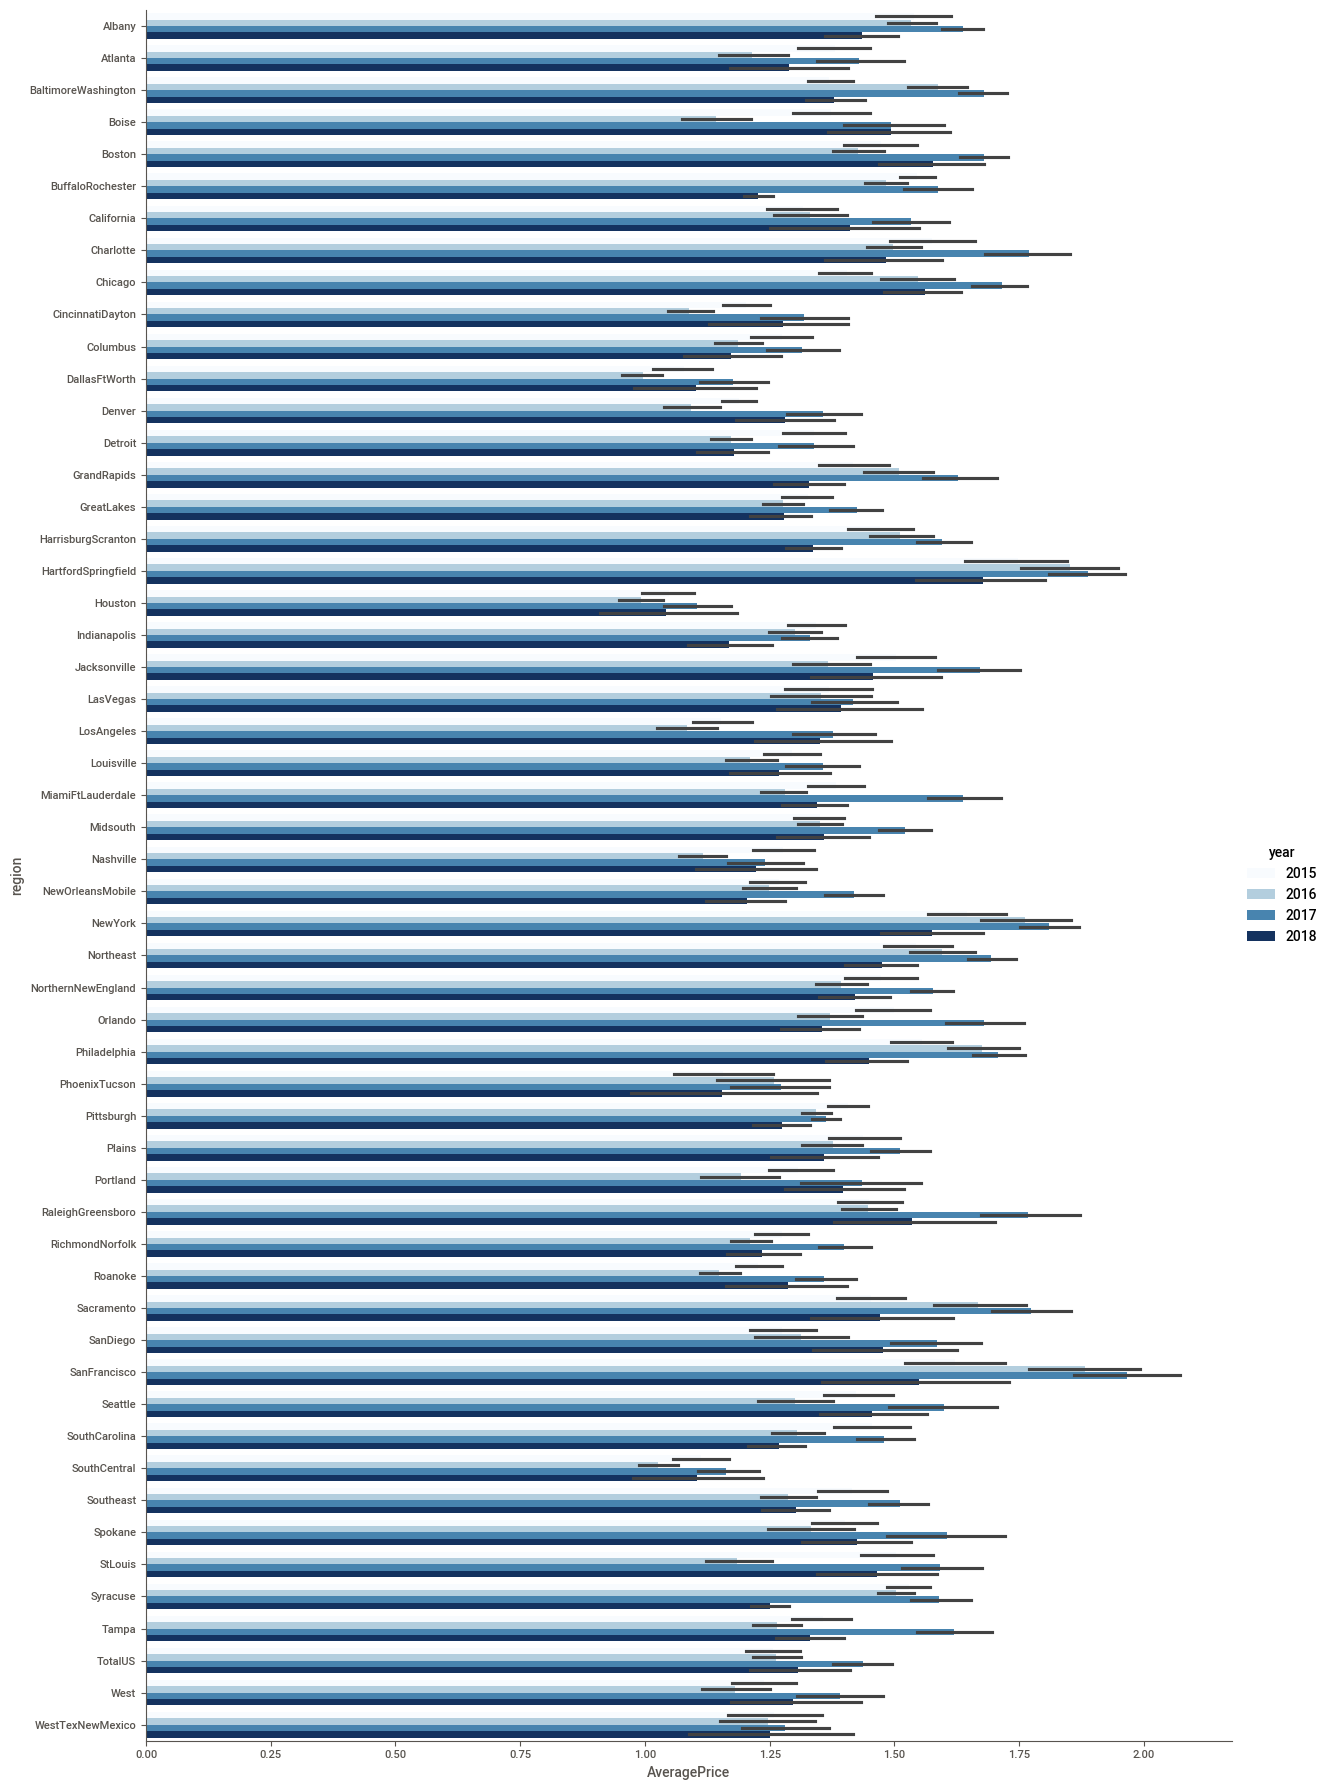

In [19]:
import seaborn as sns

# Assuming df is your DataFrame containing the necessary columns: 'AveragePrice', 'region', and 'year'

g = sns.catplot(x='AveragePrice', y='region', data=df,
                hue='year',
                height=18,
                aspect=0.7,
                palette='Blues',
                kind='bar'

                )


### Looks like there was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region. If you'll search it on google, you'll find the same.

 # TOP 5 regions where Average consumption is very high

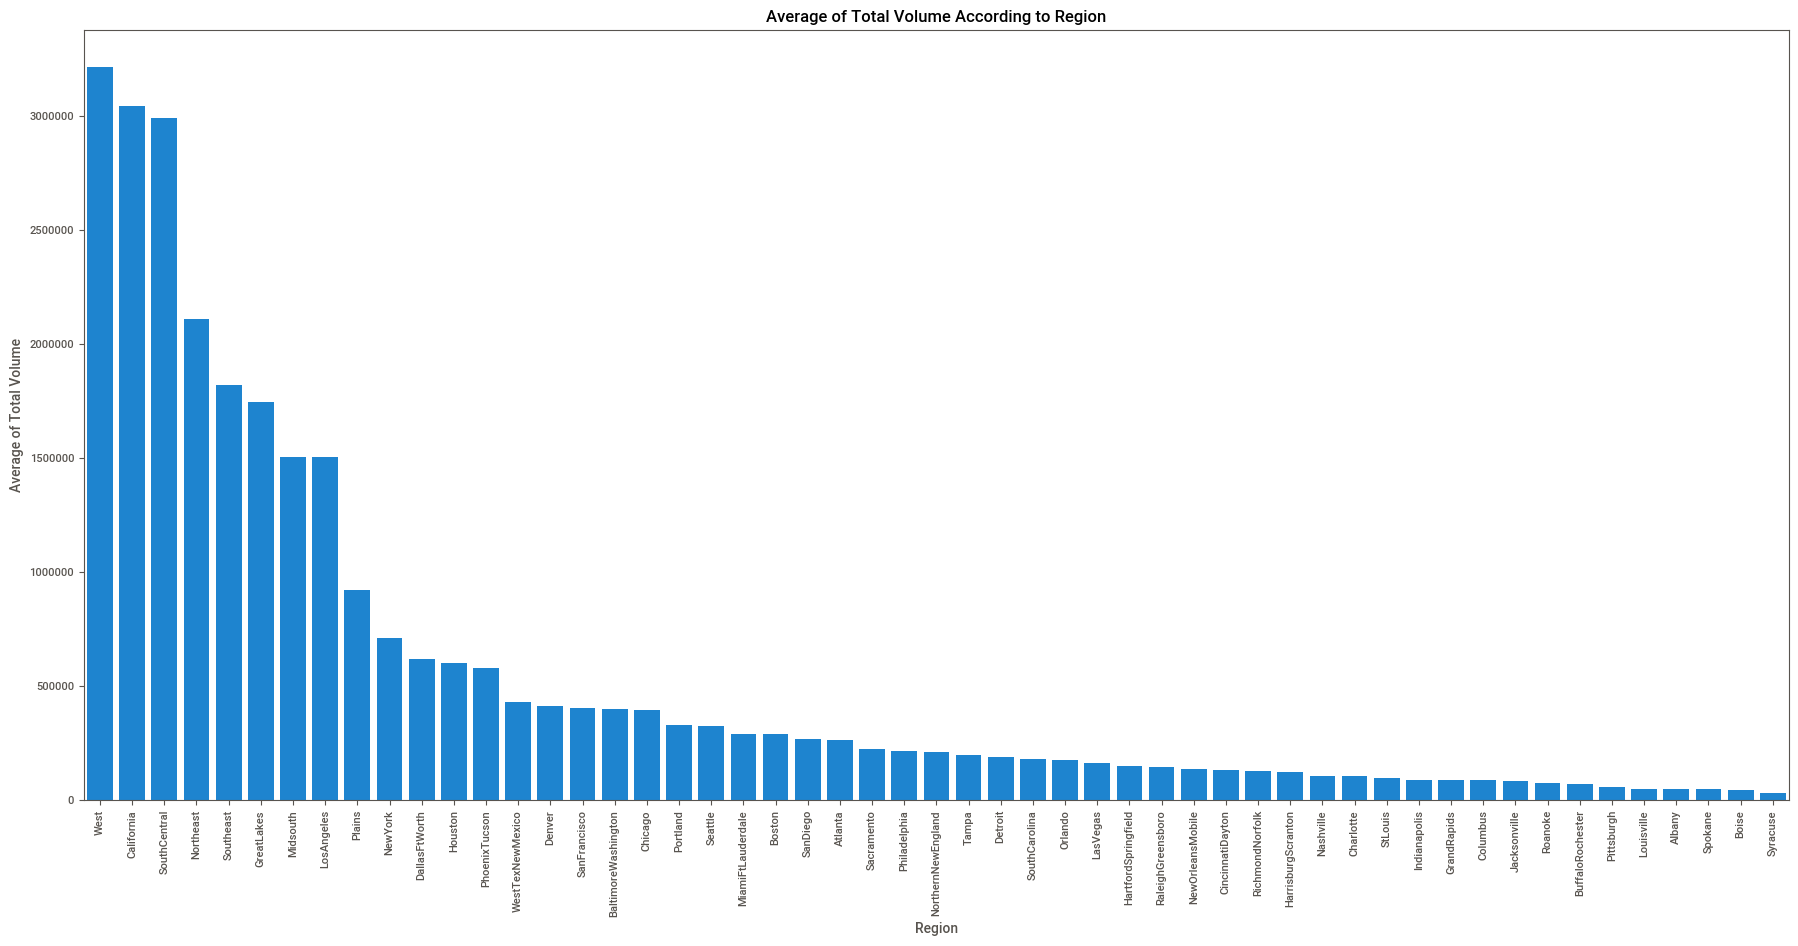

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter out rows where region is 'TotalUS'
filter1 = df.region != 'TotalUS'
df1 = df[filter1]

# Get a list of unique regions
region_list = list(df1.region.unique())

# Initialize an empty list to store average total volumes
average_total_volume = []

# Calculate average total volume for each region
for i in region_list:
    x = df1[df1.region == i]
    average_total_volume.append(sum(x['Total Volume']) / len(x))

# Create a DataFrame to store region_list and average_total_volume
df3 = pd.DataFrame({'region_list': region_list, 'average_total_volume': average_total_volume})

# Sort the DataFrame by average_total_volume in descending order
new_index = df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1 = df3.reindex(new_index)

# Create a figure for the plot
plt.figure(figsize=(22,10))

# Create the bar plot
ax = sns.barplot(x=sorted_data1.region_list, y=sorted_data1.average_total_volume)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

# Show the plot
plt.show()


## Looks like these region are where Consumption is very high
- West
- California
- SouthCentral
- Northeast
- Southeast

# Price is distributed over the date column


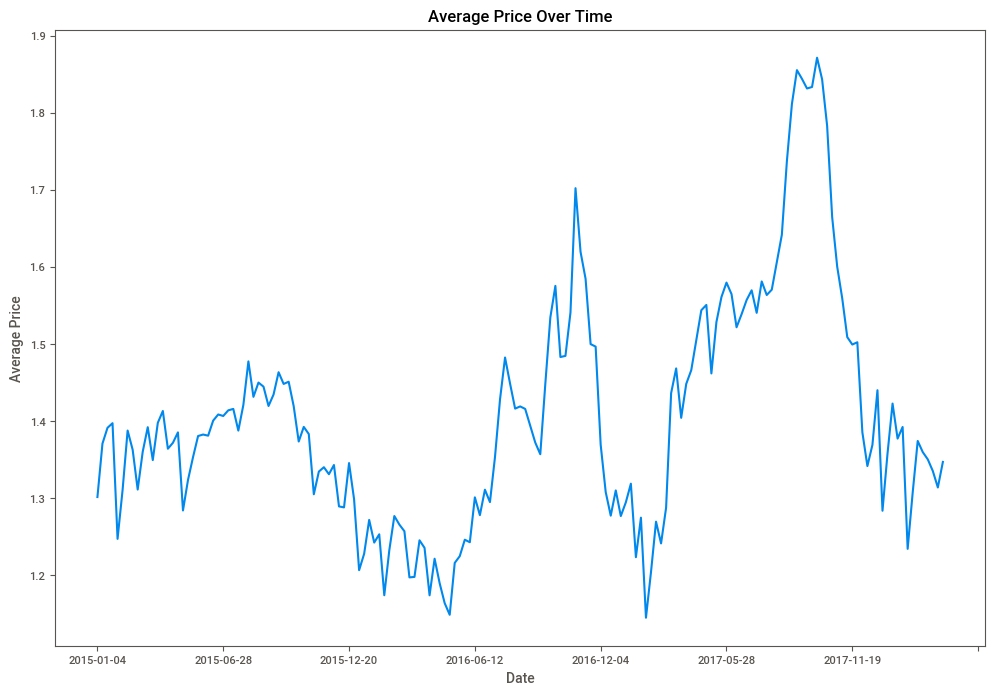

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'AveragePrice' column to numeric type
df['AveragePrice'] = pd.to_numeric(df['AveragePrice'])

# Group by 'Date' and calculate the mean of 'AveragePrice' for each date
byDate = df.groupby('Date')['AveragePrice'].mean()

# Plot the average price over time
plt.figure(figsize=(12, 8))
byDate.plot()
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

## This also shows there was a huge hike in prices after July 2017 and before Jan 2018. This was also confirmed in earlier graph too.

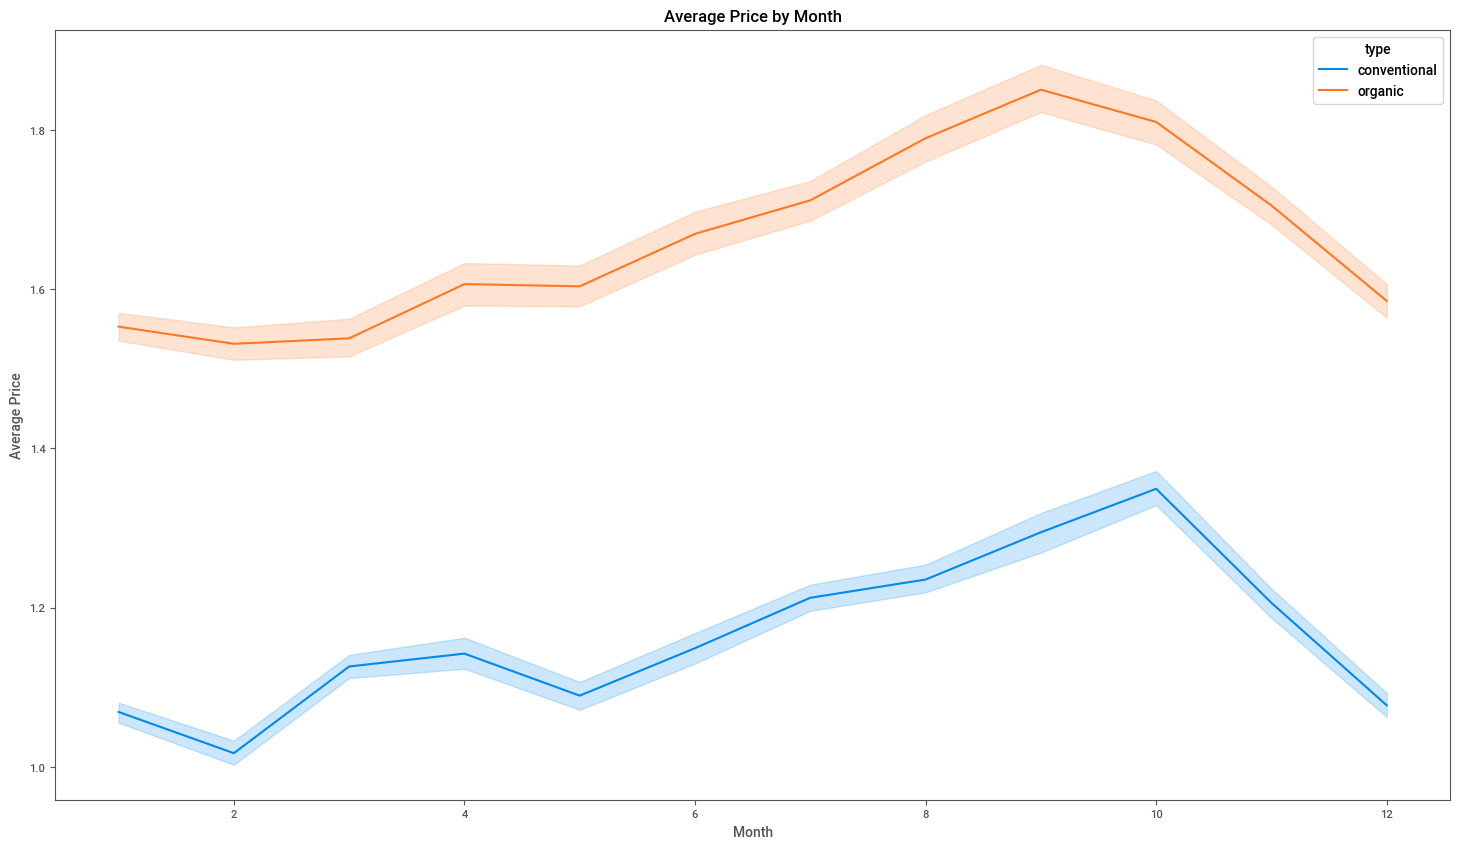

In [22]:
# Extract month from the date column
df['Month'] = pd.to_datetime(df['Date']).dt.month
plt.figure(figsize=(18, 10))
sns.lineplot(x='Month', y='AveragePrice', hue='type', data=df)
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()


### Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

#TOP 5 regions where Average price are very high

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

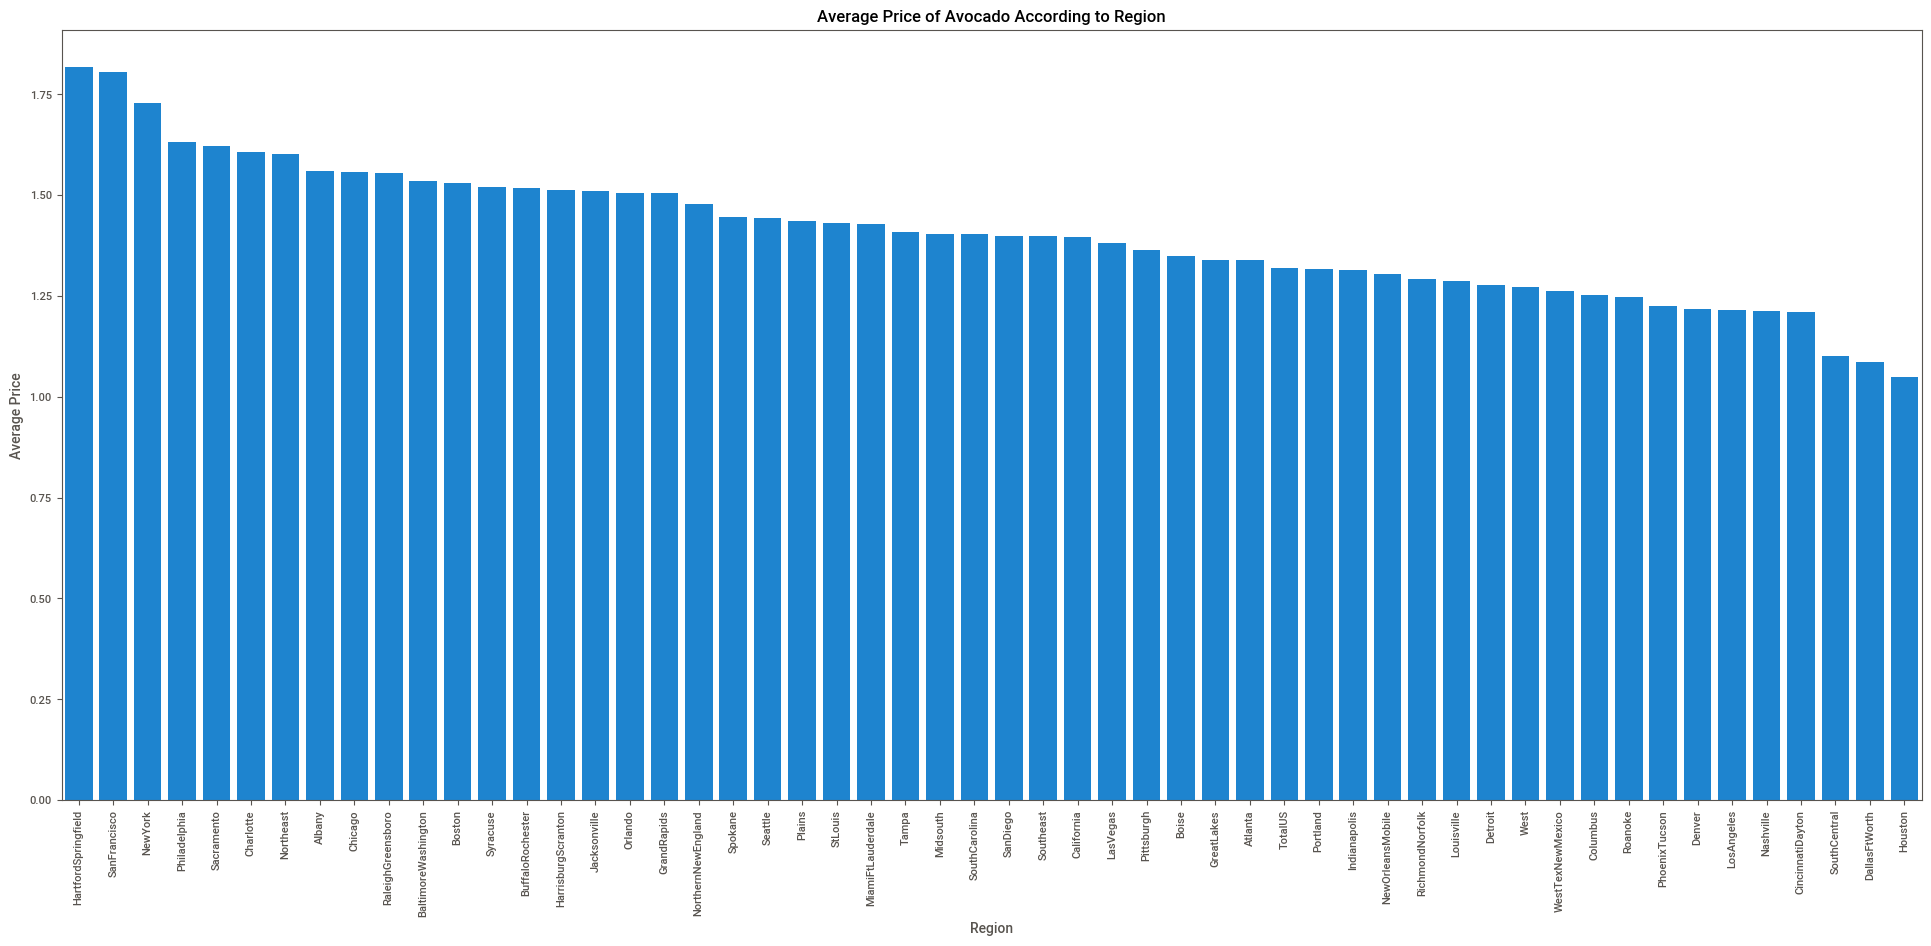

In [23]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

### Looks like these region are where price is very high
- HartfordSpringfield
- SanFrancisco
- NewYork
- Philadelphia
- Sacramento

## Preprocessing

In [24]:
# We could see Unnamed column which is not so much important so we droped
df.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
df.head()

,Date,AveragePrice,Total Volume,PLU-4046,PLU-4225,PLU-4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


- Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type

In [26]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [27]:
df.head()

,Date,AveragePrice,Total Volume,PLU-4046,PLU-4225,PLU-4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [28]:
# I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.
df.drop(columns=['Date'],inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   PLU-4046      18249 non-null  float64
 3   PLU-4225      18249 non-null  float64
 4   PLU-4770      18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [30]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [31]:
df['type'].nunique()   # As we can see there two unique type conventional and organic

2

In [32]:
df['region'].nunique()

54

- As we can see we have 54 regions.
- Two unique types, so it's going to be easy to to transform the type
  feature.
- but for the region its going to be a bit complex, so I decided to
  drop the entire column.

In [33]:
df.drop(columns=['region'],inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder   # In label encoding, each unique category in the column is assigned a unique integer
# Assuming 'df' is your DataFrame and 'type' is the column name
label_encoder = LabelEncoder()
df['types'] = label_encoder.fit_transform(df['type'])

In [35]:
df.drop(columns=['type'],inplace=True)

In [36]:
df.head()

,AveragePrice,Total Volume,PLU-4046,PLU-4225,PLU-4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,types
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


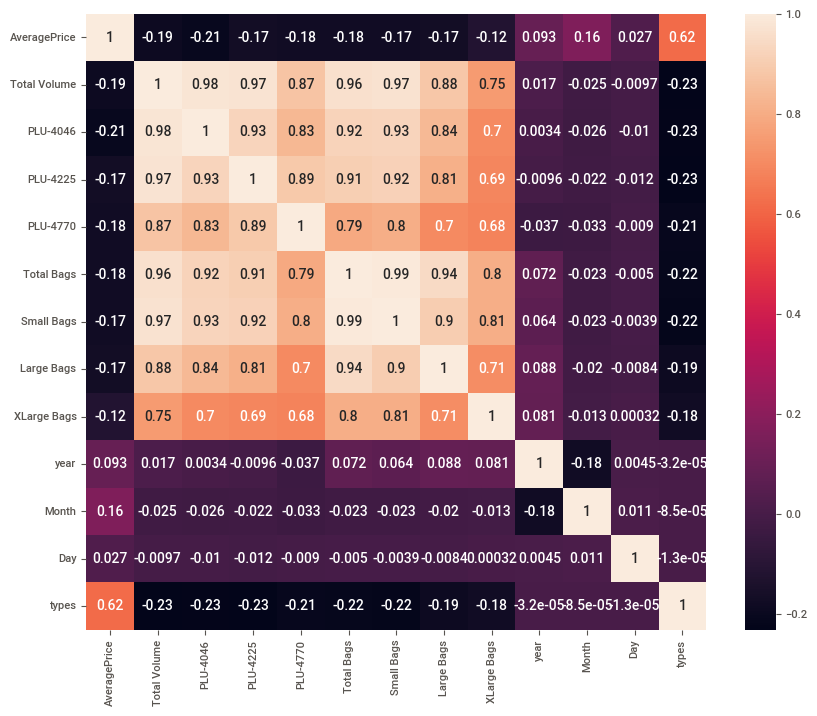

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous.

# Lets seprate the independent and dependent farute from data set

In [38]:
# Lets seprate the independent and dependent farute from data set
X=df.iloc[:,1:14]
y=df['AveragePrice']

In [39]:
X.columns

Index(['Total Volume', 'PLU-4046', 'PLU-4225', 'PLU-4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day',
       'types'],
      dtype='object')

In [40]:
X

,Total Volume,PLU-4046,PLU-4225,PLU-4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,types
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [41]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

# Spliting the data set

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Creating and Training the Model LinearRegression

In [43]:
# Import model LinearRegression
from sklearn.linear_model import LinearRegression

# make instance
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# checking training score
print("Training  Score:",model.score(X_train, y_train))

Training  Score: 0.44021406715754996


In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print("Testing Score :",r2_score(y_test,y_pred))

Testing Score : 0.43307059346676857


In [45]:
# Evaluate the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2329713329168234
MSE: 0.09108802805353948
RMSE: 0.30180793239002096


As we can see the error is low which is good but we can also see the model accuracy is to low so we go for next model

# Popynomial model

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=1)  # You can adjust the degree as needed
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Print the training score
print("Training Score:", model.score(X_train_poly, y_train))

Training Score: 0.4402140671574727


In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate and print the testing score
testing_score = r2_score(y_test, y_pred)
print("Testing Score:", testing_score)

Testing Score: 0.4330705934727913


In [48]:
# Evaluate the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.23297133291572697
MSE: 0.09108802805257181
RMSE: 0.30180793238841785


Again we found low accuracy we move to another algo

# DTR Model

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

# Print the training score
print("Training Score:", dtr.score(X_train, y_train))

Training Score: 1.0


In [50]:
pred=dtr.predict(X_test)
testing_score = r2_score(y_test, pred)
print("Testing Score:", testing_score)

Testing Score: 0.7107349824509721


In [51]:
# Evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13747397260273975
MSE: 0.04647594520547945
RMSE: 0.2155828035940702


## Here we got the model accuracy but this looking Overfited because Model traing and testing accuracy is far away from each other i.e low bias and High variance.

# Random Forest Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42)  # You can adjust the number of estimators
rf_regressor.fit(X_train, y_train)
# Training score
train_score = rf_regressor.score(X_train, y_train)
print("Training Score:", train_score)

Training Score: 0.9830149445690961


In [53]:
# Training score
train_score = rf_regressor.score(X_train, y_train)
print("Training Score:", train_score)

Training Score: 0.9830149445690961


In [54]:
# Testing score
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
test_score = rf_regressor.score(X_test, y_test)
print("Testing Score:", test_score)

Testing Score: 0.8690530320075698


In [55]:
# Evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.10004175890410968
MSE: 0.021039129310575378
RMSE: 0.14504871357780247


# As We can see the great accuracy with minimal error and also solved th model overfiting problem RandomForest Regressor is the best model in this case.

In [56]:
# Use the trained model to make predictions on the new data
# 17074.83	2046.96	1529.20	0.00	13498.67	13066.82	431.85	0.0	2018	2	4	1
import numpy as np

X_new =np.array([['17074.83','2046.96','1529.20','0.00','13498.67','13066.82','431.85','0.0','2018','2','4','1']])
X_new = X_new.astype(float)
y_pred_new = rf_regressor.predict(X_new)

# Print the predicted values
print("Predicted AveragePrice is :", y_pred_new)

Predicted AveragePrice is : [1.55682]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [57]:
import numpy as np
# 51039.60	941.48	43838.39	75.78	6183.95	5986.26	197.69	0.0	2015	11	29	0
X_new =np.array([['51039.60','941.48','43838.39','75.78','6183.95','5986.26','197.69','0.0','2015','11','29','0']])
X_new = X_new.astype(float)
y_pred_new = rf_regressor.predict(X_new)

# Print the predicted values
print("Predicted AveragePrice is :", y_pred_new)

Predicted AveragePrice is : [1.25676]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Saving the trained Model

In [58]:
from joblib import dump

# Save the trained model to a file
model_filename = 'Avocado_Project.joblib'
dump(rf_regressor, model_filename)

print("Model saved to", model_filename)


Model saved to Avocado_Project.joblib


# Now task two perfrom classification algorithms for same dataset to predict the type of the Avocado is it organic or conventional types

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
PLU-4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
PLU-4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
PLU-4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [60]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(df)

In [61]:
# convert X_scaled to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled,columns=df.columns)

In [62]:
X_scaled_df.head() # checking record coversion done or not

,AveragePrice,Total Volume,PLU-4046,PLU-4225,PLU-4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,types
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,1.000000,0.866667,0.0
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,1.000000,0.633333,0.0
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,1.000000,0.400000,0.0
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,1.000000,0.166667,0.0
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0.909091,0.933333,0.0


In [63]:
# Collecting the scaled data into data frame
df = X_scaled_df

In [64]:
df.describe().T   # then again checked statistical summary and hence all record are converted into same scale or same unit

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,0.343765,0.143301,0.0,0.234875,0.330961,0.434164,1.0
Total Volume,18249.0,0.013608,0.055252,0.0,0.000172,0.001717,0.006925,1.0
PLU-4046,18249.0,0.012883,0.055620,0.0,0.000038,0.000380,0.004881,1.0
PLU-4225,18249.0,0.014418,0.058822,0.0,0.000147,0.001420,0.007338,1.0
PLU-4770,18249.0,0.008969,0.042202,0.0,0.000000,0.000073,0.002452,1.0
Total Bags,18249.0,0.012370,0.050908,0.0,0.000263,0.002051,0.005718,1.0
Small Bags,18249.0,0.013612,0.055749,0.0,0.000213,0.001970,0.006226,1.0
Large Bags,18249.0,0.009501,0.042658,0.0,0.000022,0.000463,0.003852,1.0
XLarge Bags,18249.0,0.005631,0.032070,0.0,0.000000,0.000000,0.000240,1.0
year,18249.0,0.382633,0.313313,0.0,0.000000,0.333333,0.666667,1.0


# Lets seprate the independent and dependent fearutes from data set

In [65]:
df.shape

(18249, 13)

In [66]:
X=df.iloc[:,0:12]
y=df['types']

In [67]:
X.shape

(18249, 12)

In [68]:
X

,AveragePrice,Total Volume,PLU-4046,PLU-4225,PLU-4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0,1.000000,0.866667
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0,1.000000,0.633333
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0,1.000000,0.400000
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0,1.000000,0.166667
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0,0.909091,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.423488,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0,0.090909,0.100000
18245,0.451957,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0,0.000000,0.900000
18246,0.508897,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0,0.000000,0.666667
18247,0.530249,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0,0.000000,0.433333


In [69]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18244    1.0
18245    1.0
18246    1.0
18247    1.0
18248    1.0
Name: types, Length: 18249, dtype: float64

# Spliting the data sets into independent and target feature

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape

(14599, 12)

In [72]:
y_train.shape

(14599,)

In [73]:
X_test.shape,y_test.shape

((3650, 12), (3650,))

# importing classification algo & it classification matrix

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# LogisticRegression Classifier

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Get the training accuracy
train_accuracy = lr.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Get the testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Evaluate the model
print("Accuracy:", test_accuracy)


Training Accuracy: 0.8378656072333721
Accuracy: 0.8336986301369863


# Decision Tree Classifier Model

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(X_train, y_train)

# Get the training accuracy
train_accuracy = dtc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Make predictions on the testing data
y_pred = dtc.predict(X_test)

# Get the testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Evaluate the model
print("Accuracy:", test_accuracy)


Training Accuracy: 1.0
Accuracy: 0.9873972602739726


###  DTC looking overfiting let apply another algo

# Random Forest Classifier Model

In [84]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Get training accuracy for Random Forest Classifier
train_accuracy_rf = rf_classifier.score(X_train, y_train)
print("Random Forest Training Accuracy:", train_accuracy_rf)

# Make predictions using Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)

# Get testing accuracy for Random Forest Classifier
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Testing Accuracy:", test_accuracy_rf)

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.9961643835616438


# Gradient Boosting Classifier

In [85]:
# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train Gradient Boosting Classifier
gb_classifier.fit(X_train, y_train)

# Get training accuracy for Gradient Boosting Classifier
train_accuracy_gb = gb_classifier.score(X_train, y_train)
print("Gradient Boosting Training Accuracy:", train_accuracy_gb)

# Make predictions using Gradient Boosting Classifier
y_pred_gb = gb_classifier.predict(X_test)

# Get testing accuracy for Gradient Boosting Classifier
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Testing Accuracy:", test_accuracy_gb)

Gradient Boosting Training Accuracy: 0.9939721898760189
Gradient Boosting Testing Accuracy: 0.9906849315068493


# All the above models give good accuracy we can use any of the above train model to develoved or prediction for new data

In [88]:
import numpy as np
# Assuming X_new is your new data
X_new = np.array([[0.53024, 0.000258, 0.000067, 0.0000146, 0.000286, 0.000566, 0.000816, 0.000009, 0.0, 1.0, 0.00000, 0.43333]])

# Make predictions on the new data
y_pred_new_rf = rf_classifier.predict(X_new)

# Print the predicted values
print("Predicted values for new data:", y_pred_new_rf)


Predicted values for new data: [1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [92]:
import numpy as np

# Assuming X_new is your new data
X_new = np.array([[0.298932, 0.000815, 0.000041, 0.002142, 0.000030, 0.000319, 0.000447, 0.000035, 0.0, 0.0, 0.909091, 0.93333]])
# Make predictions on the new data
y_pred_new_rf = rf_classifier.predict(X_new)

# Print the predicted values
print("Predicted values for new data:", y_pred_new_rf)


Predicted values for new data: [0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# As We konw that 1 = " Oraganic types" & 0 = "Conventional" Our model predicted well

# Saving the trained Model

In [93]:
from joblib import load, dump

# Define the file path and name for saving the model
model_filename = 'Avocado_Project2.joblib'

# Assuming rf_regressor is your trained Random Forest Regressor
# Save the model to a file
dump(rf_regressor, model_filename)

# Load the model from the file
loaded_model = load(model_filename)

# Now you can use loaded_model to make predictions or perform other operations
